In [1]:
from Pyfhel import Pyfhel, PyCtxt, PyPtxt
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import random
import time

***Sum test defining***

In [2]:
def addTest(p, m):
    start_time = time.time()
    random.seed(42)
    HE = Pyfhel()
    HE.contextGen(p, m)
    HE.keyGen()


    i = 0
    tot = 0.0
    ctot = HE.encryptFrac(tot)
    startNoise = HE.noiseLevel(ctot)

    while True:
        i += 1
        new = random.random()
        cnew = HE.encryptFrac(new)

        tot += new
        ctot += cnew

        if(round(tot,3) != round(HE.decryptFrac(ctot),3)):
            break

    return {
        'startNoise': startNoise,
        'endNoise': HE.noiseLevel(ctot),
        'tests_executed': i,
        'time': time.time() - start_time
    }


***Defining plot function***

In [3]:
def plot_test(iterator, results, variable, value, testType):
    fig, ax = plt.subplots()
    ax.plot(iterator, [result[value] for result in results])

    ax.set(xlabel=variable, ylabel=value,
        title=testType)
    ax.grid()

    fig.savefig(f"{testType}.png")
    plt.show()

***Test sum at the variation of p***

In [4]:
#test variating p

check_range = [4003, 12161, 20983, 30181, 39631, 49367, 59107]
resultsAddTestP = [addTest(param, 2**12) for param in tqdm(check_range)]


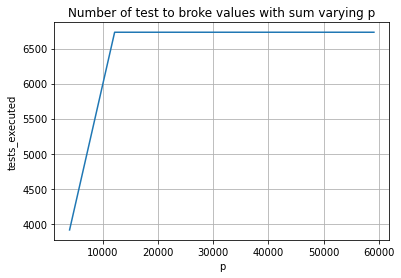

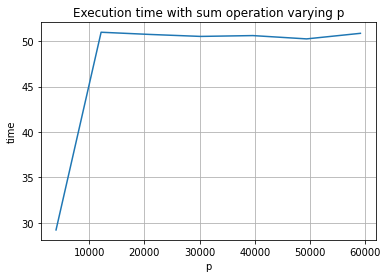

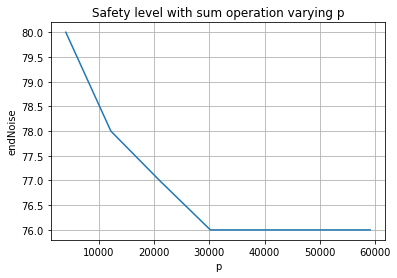

In [5]:
plot_test(check_range, resultsAddTestP, 'p', 'tests_executed', 'Number of test to broke values with sum varying p')
plot_test(check_range, resultsAddTestP, 'p', 'time', 'Execution time with sum operation varying p')
plot_test(check_range, resultsAddTestP, 'p', 'endNoise', 'Safety level with sum operation varying p')

***Define multiplication test***

In [6]:
def mulTest(p, m):
    start_time = time.time()
    random.seed(42)
    HE = Pyfhel()
    HE.contextGen(p, m)
    HE.keyGen()
    
    i = 0
    tot = 1.0
    ctot = HE.encryptFrac(tot)
    startNoise = HE.noiseLevel(ctot)


    while True:
        i += 1
        new = random.random()
        cnew = HE.encryptFrac(new)
        tot *= new
        ctot *= cnew
        if(round(tot,3) != round(HE.decryptFrac(ctot),3)):
            break
       
   
    return {
        'startNoise': startNoise,
        'endNoise': HE.noiseLevel(ctot),
        'tests_executed': i,
        'time': time.time() - start_time
    }


        

***Test multiplication at variation of p***

In [21]:
#test variating p
check_range = [4003, 12161, 20983, 30181, 39631, 49367, 59107]
resultsMulTestP = [mulTest(param, 2**12) for param in tqdm(check_range)]

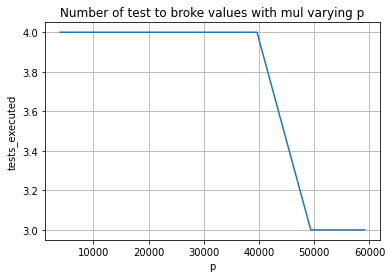

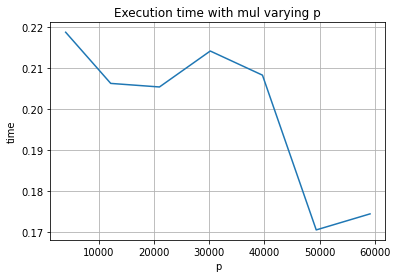

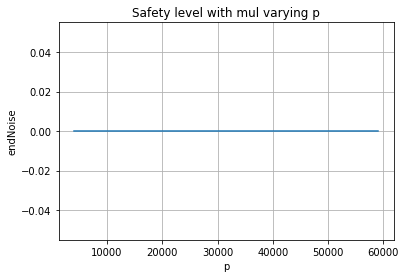

In [22]:
plot_test(check_range, resultsMulTestP, 'p', 'tests_executed', 'Number of test to broke values with mul varying p')
plot_test(check_range, resultsMulTestP, 'p', 'time', 'Execution time with mul varying p')
plot_test(check_range, resultsMulTestP, 'p', 'endNoise', 'Safety level with mul varying p')

***Test multiplication at variation of m***

In [9]:
#test variating m
check_range = [2**10, 2**11, 2**12, 2**13, 2**14]
resultsMulTestM = [mulTest(49367, param) for param in tqdm(check_range)]

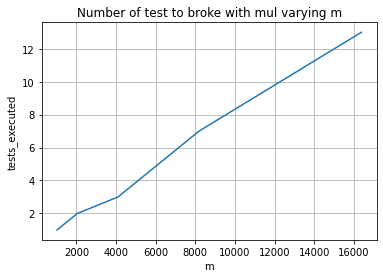

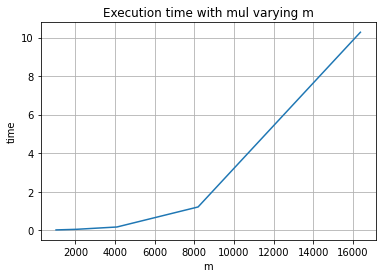

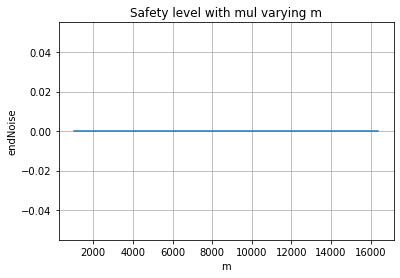

In [10]:
plot_test(check_range, resultsMulTestM, 'm', 'tests_executed', 'Number of test to broke with mul varying m')
plot_test(check_range, resultsMulTestM, 'm', 'time', 'Execution time with mul varying m')
plot_test(check_range, resultsMulTestM, 'm', 'endNoise', 'Safety level with mul varying m')


In [11]:
def mulRelTest(p, m):
    start_time = time.time()
    random.seed(42)
    HE = Pyfhel()
    HE.contextGen(p, m)
    HE.keyGen()
    
    i = 0
    tot = 1.0
    ctot = HE.encryptFrac(tot)
    startNoise = HE.noiseLevel(ctot)
    
    relinKeySize=3
    HE.relinKeyGen(bitCount=10, size=relinKeySize)


    while True:
        i += 1
        new = random.random()
        cnew = HE.encryptFrac(new)
        tot *= new
        ctot *= cnew
        ~ctot
        if(round(tot,3) != round(HE.decryptFrac(ctot),3)):
            break
       
   
    return {
        'startNoise': startNoise,
        'endNoise': HE.noiseLevel(ctot),
        'tests_executed': i,
        'time': time.time() - start_time
    }


In [12]:
def plot_test_compare(iterator, results1, results2, variable, value, testType):
    fig, ax = plt.subplots()
    ax.plot(iterator, [result[value] for result in results1])
    ax.plot(iterator, [result[value] for result in results2])


    ax.set(xlabel=variable, ylabel=value,
        title=testType)
    ax.grid()

    fig.savefig(f"{testType}.png")
    plt.show()

In [13]:
check_range = [4003, 12161, 20983, 30181, 39631, 49367, 59107]
resultsMulRelTestP = [mulRelTest(param, 2**12) for param in tqdm(check_range)]

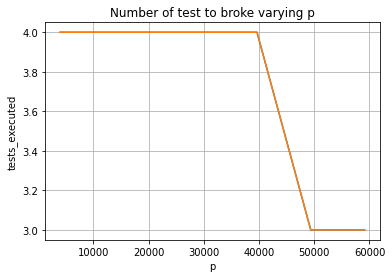

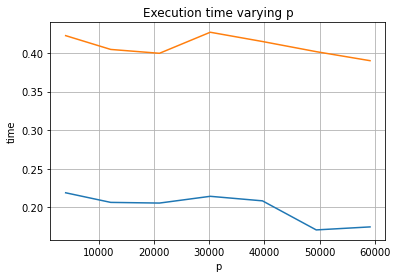

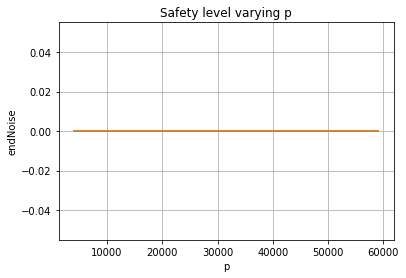

In [23]:
plot_test_compare(check_range, resultsMulTestP, resultsMulRelTestP, 'p', 'tests_executed', 'Number of test to broke varying p')
plot_test_compare(check_range, resultsMulTestP, resultsMulRelTestP, 'p', 'time', 'Execution time varying p')
plot_test_compare(check_range, resultsMulTestP, resultsMulRelTestP, 'p', 'endNoise', 'Safety level varying p')

In [15]:
check_range = [2**10, 2**11, 2**12, 2**13, 2**14]
resultsMulRelTestM = [mulRelTest(49367, param) for param in tqdm(check_range)]

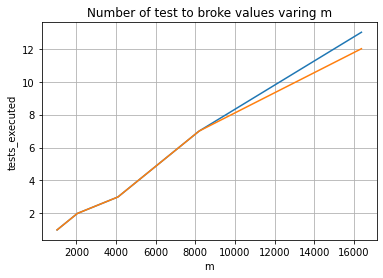

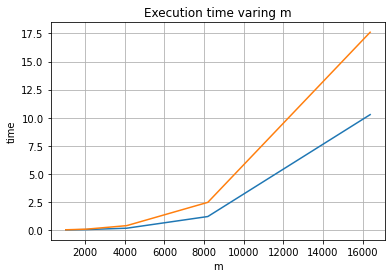

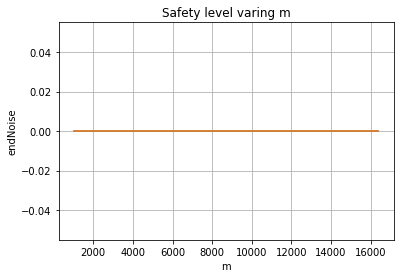

In [16]:
plot_test_compare(check_range, resultsMulTestM, resultsMulRelTestM, 'm', 'tests_executed', 'Number of test to broke values varing m')
plot_test_compare(check_range, resultsMulTestM, resultsMulRelTestM, 'm', 'time', 'Execution time varing m')
plot_test_compare(check_range, resultsMulTestM, resultsMulRelTestM, 'm', 'endNoise', 'Safety level varing m')